In [1]:
%matplotlib inline


# Extrema


We detect local maxima in a galaxy image. The image is corrupted by noise,
generating many local maxima. To keep only those maxima with sufficient
local contrast, we use h-maxima.



In [2]:
import numpy as np

import matplotlib.pyplot as plt

from skimage.measure import label
from skimage import data
from skimage import color
from skimage.morphology import extrema
from skimage import exposure


color_image = data.hubble_deep_field()

# for illustration purposes, we work on a crop of the image.
x_0 = 70
y_0 = 354
width = 100
height = 100

img = color.rgb2grey(color_image)[y_0:(y_0 + height), x_0:(x_0 + width)]

# the rescaling is done only for visualization purpose.
# the algorithms would work identically in an unscaled version of the
# image. However, the parameter h needs to be adapted to the scale.
img = exposure.rescale_intensity(img)

MAXIMA DETECTION



In [3]:
# Maxima in the galaxy image are detected by mathematical morphology.
# There is no a priori constraint on the density.

# We find all local maxima
local_maxima = extrema.local_maxima(img)
label_maxima = label(local_maxima)
overlay = color.label2rgb(label_maxima, img, alpha=0.7, bg_label=0,
                          bg_color=None, colors=[(1, 0, 0)])

# We observed in the previous image, that there are many local maxima
# that are caused by the noise in the image.
# For this, we find all local maxima with a height of h.
# This height is the grey level value by which we need to descent
# in order to reach a higher maximum and it can be seen as a local
# contrast measurement.
# The value of h scales with the dynamic range of the image, i.e.
# if we multiply the image with a constant, we need to multiply
# the value of h with the same constant in order to achieve the same result.
h = 0.05
h_maxima = extrema.h_maxima(img, h)
label_h_maxima = label(h_maxima)
overlay_h = color.label2rgb(label_h_maxima, img, alpha=0.7, bg_label=0,
                            bg_color=None, colors=[(1, 0, 0)])

GRAPHICAL OUTPUT



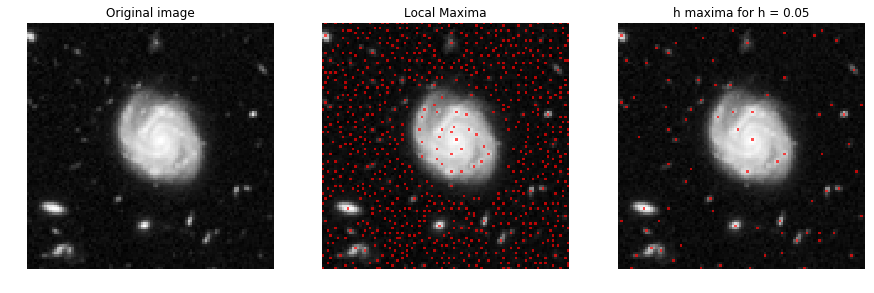

In [4]:
# a new figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray', interpolation='none')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(overlay, interpolation='none')
ax[1].set_title('Local Maxima')
ax[1].axis('off')

ax[2].imshow(overlay_h, interpolation='none')
ax[2].set_title('h maxima for h = %.2f' % h)
ax[2].axis('off')
plt.show()